Libraries Used -

Numpy - 1.19.0   
Pandas - 1.0.5    
Matplotlib - 3.2.2    
Seaborn - 0.11.1   
Scikit-Learn - 0.23.2   
Keras - 2.4.3   
Tensorflow - 1.0.0

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Loading the dataset
data = pd.read_csv('diabetes.csv')

In [83]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
#describing our dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [86]:
data.shape

(768, 9)

In [87]:
#There are many zero values in our dataset,i am replacing them with null.
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [88]:
#we can see there are too many null values, so i will be replacing them by their respective median
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [89]:
#defining median function
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [90]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [91]:
#changing null values to median depending upon outcome.
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [92]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [93]:
#changing null values to median depending upon outcome.
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

In [94]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [95]:
#changing null values to median depending upon outcome.
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [96]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [97]:
#changing null values to median depending upon outcome.
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [98]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [99]:
#changing null values to median depending upon outcome.
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [100]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


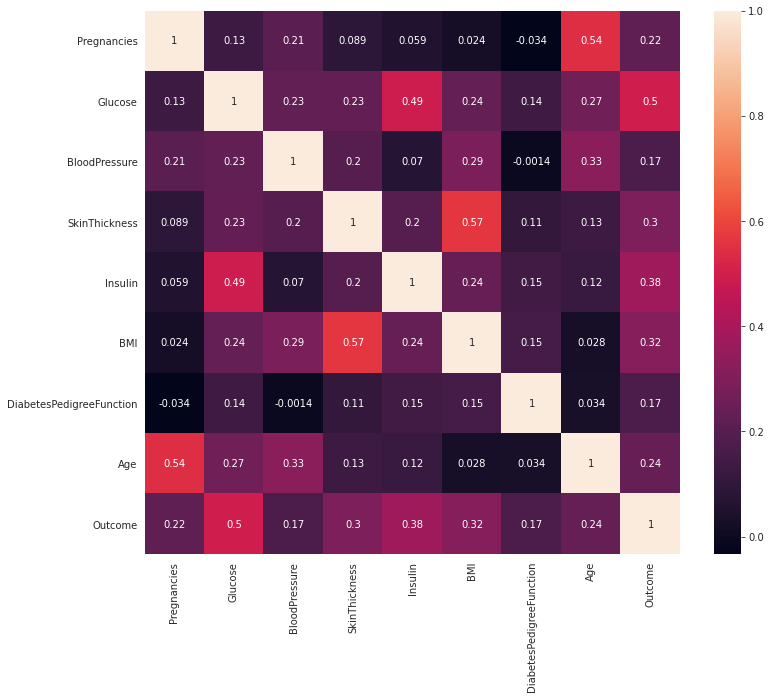

In [101]:
#displaying correlation matrix
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot =True)

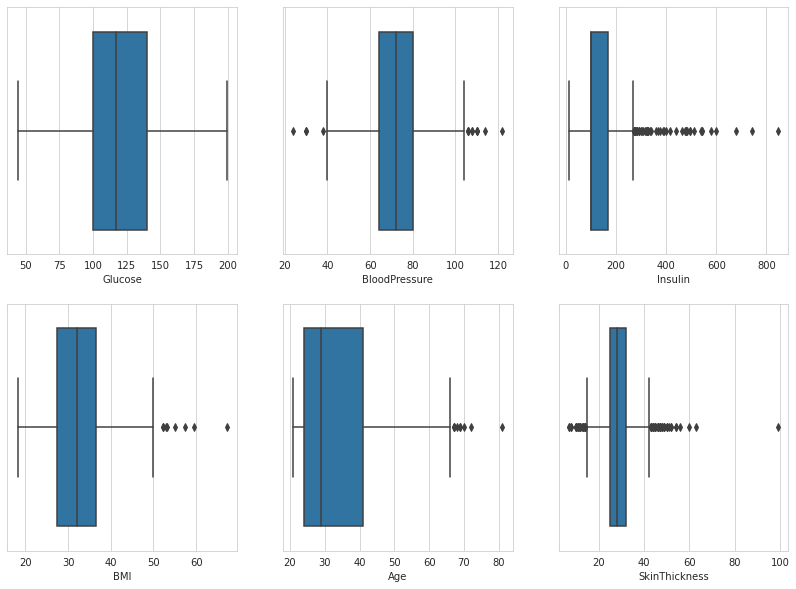

In [102]:
#displaying range of data
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

In [103]:
#train_test_splitting of the dataset
x = data.drop(columns = 'Outcome')
# Getting Predicting Value
y = data['Outcome']
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [104]:
#training model using Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        99
           1       0.75      0.76      0.76        55

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.83      0.82      0.83       154

Confusion Matrix:
 [[85 14]
 [13 42]]
Training Score:
 76.2214983713355


In [106]:
#printing accuracy score
print(accuracy_score(y_test,y_pred)*100)

82.46753246753246


In [107]:
#training model using KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [108]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.81      0.85      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154

Confusion Matrix:
 [[88 11]
 [ 8 47]]
Training Score:
 88.76221498371335


In [109]:
#printing accuracy score
print(accuracy_score(y_test,y_pred)*100)

87.66233766233766


In [110]:
#training model using SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        99
           1       0.76      0.91      0.83        55

    accuracy                           0.86       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.88      0.86      0.87       154

Confusion Matrix:
 [[83 16]
 [ 5 50]]
Training Score:
 85.01628664495115


In [112]:
#printing accuracy score
print(accuracy_score(y_test,y_pred)*100)

86.36363636363636


In [113]:
#training model using Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [114]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84        99
           1       0.70      0.78      0.74        55

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix:
 [[81 18]
 [12 43]]
Training Score:
 77.36156351791531


In [115]:
#printing accuracy score
print(accuracy_score(y_test,y_pred)*100)

80.51948051948052


In [116]:
#training model using Decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [117]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        99
           1       0.86      0.78      0.82        55

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154

Confusion Matrix:
 [[92  7]
 [12 43]]
Training Score:
 90.87947882736157


In [118]:
#printing accuracy score
print(accuracy_score(y_test,y_pred)*100)

87.66233766233766


In [119]:
#training model using Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        99
           1       0.88      0.89      0.88        55

    accuracy                           0.92       154
   macro avg       0.91      0.91      0.91       154
weighted avg       0.92      0.92      0.92       154

Confusion Matrix:
 [[92  7]
 [ 6 49]]
Training Score:
 100.0


In [121]:
#printing accuracy score
print(accuracy_score(y_test,y_pred)*100)

91.55844155844156


In [122]:
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
xf,yf = [],[]
xf.append(feature_scores.index)
yf.append(feature_scores.values)

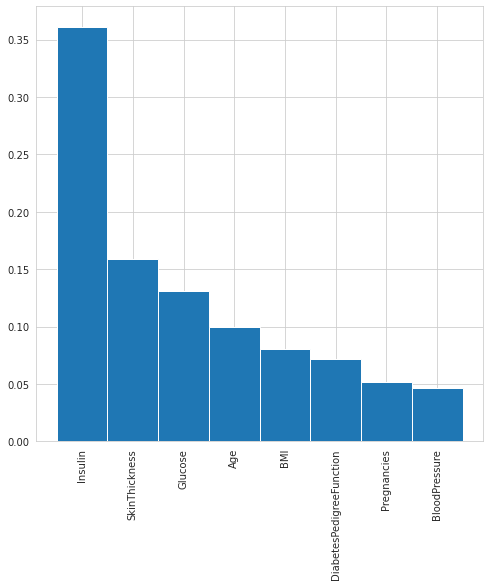

In [123]:
#feature importance plot for random forest
xf = np.array(xf)
yf = np.array(yf)
fig = plt.figure(figsize = (8, 8))
plt.bar(xf[0],yf[0],width= 1)
plt.xticks(rotation=90)
plt.show()

In [124]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [191]:
#making neural network
model = Sequential()
# 1st layer: input_dim=8, 16 nodes, RELU
model.add(Dense(16, input_dim=8,activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid' ))

In [204]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [193]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [194]:
# Fit the model on the training dataset
history = model.fit( x_train, y_train, epochs=150,batch_size=16, validation_split=0.20)

Epoch 1/150
31/31 [==============================] - 1s 12ms/step - loss: 2.0585 - accuracy: 0.5381 - val_loss: 0.7412 - val_accuracy: 0.6585
Epoch 2/150
31/31 [==============================] - 0s 2ms/step - loss: 0.8787 - accuracy: 0.6630 - val_loss: 1.7996 - val_accuracy: 0.6260
Epoch 3/150
31/31 [==============================] - 0s 3ms/step - loss: 1.1601 - accuracy: 0.6448 - val_loss: 0.5919 - val_accuracy: 0.7480
Epoch 4/150
31/31 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7264 - val_loss: 0.6340 - val_accuracy: 0.6911
Epoch 5/150
31/31 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.6841 - val_loss: 0.7760 - val_accuracy: 0.6341
Epoch 6/150
31/31 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.6450 - val_loss: 0.6346 - val_accuracy: 0.6992
Epoch 7/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7446 - val_loss: 0.6564 - val_accuracy: 0.6748
Epoch 8/150


In [195]:
accuracy_test = model.evaluate(x_test, y_test)
print("")
print("Test Accuracy     : " + str(accuracy_test[1]))

5/5 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8571

Test Accuracy     : 0.8571428656578064


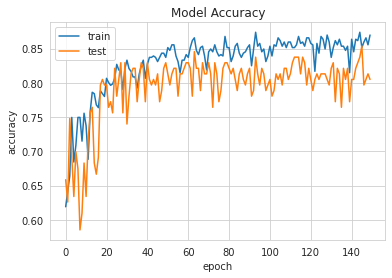

In [196]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

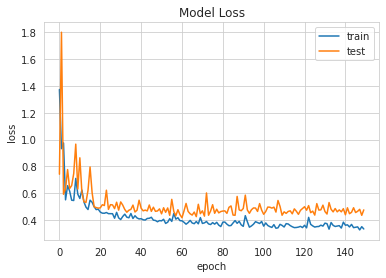

In [197]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [198]:
y_predict = model.predict_classes(x_test)
y_pred_prob = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [199]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix')

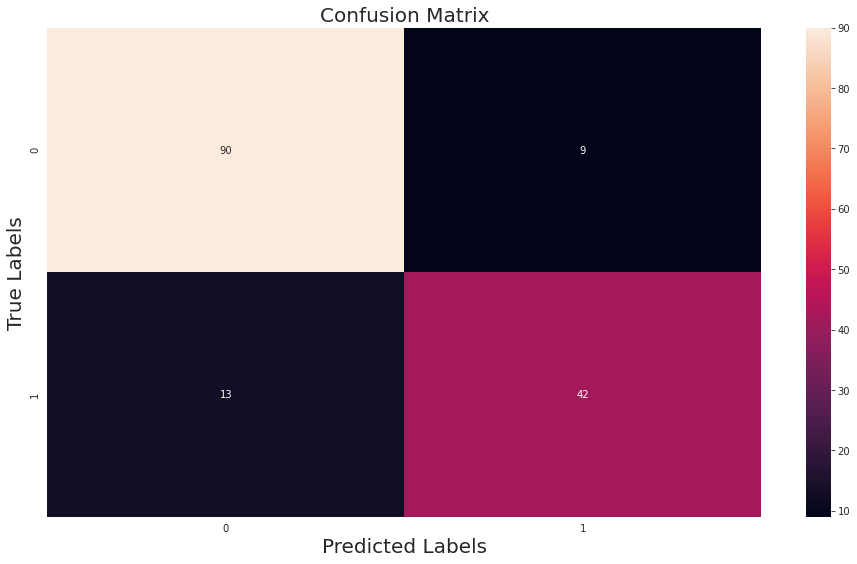

In [200]:
#displaying confusion matrix for our neural network model
matrix = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 

In [201]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  90
False Positives:  9
False Negatives:  13
True Positives:  42


In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [203]:
print('Accuracy on testing set:', accuracy_score(y_test, y_predict))
print('Precision on testing set:', precision_score(y_test, y_predict))
print('Recall on testing set:', recall_score(y_test, y_predict))

Accuracy on testing set: 0.8571428571428571
Precision on testing set: 0.8235294117647058
Recall on testing set: 0.7636363636363637
